# FCBF : Fast Correlation Based Filter for Feature Selection

In [1]:
library("FCBF")
library('mlbench')
library('caret')

Loading required package: lattice

Loading required package: ggplot2



In [2]:
sessionInfo()$ R.version$version.string


[1] "R version 4.1.0 (2021-05-18)"

## Read pre-processed input data

In [3]:
GideHugoRiaz_AntiPD1_rmcorr <- readRDS("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/train_AntiPD1_rmcorr.rds")

In [4]:
exp_feat_rmcorr <- grep("[0-9]",colnames(GideHugoRiaz_AntiPD1_rmcorr))

mod_inp_mat <- cbind(GideHugoRiaz_AntiPD1_rmcorr$"Response", GideHugoRiaz_AntiPD1_rmcorr[, c(exp_feat_rmcorr)])
colnames(mod_inp_mat)[colnames(mod_inp_mat) == "GideHugoRiaz_AntiPD1_rmcorr$Response"] <- "Response"

# input for modeling
mod_inp_mat$Response <- as.character(mod_inp_mat$Response)
mod_inp_mat[mod_inp_mat$Response == '1',"Response"] <- 'Y' 
mod_inp_mat[mod_inp_mat$Response == '0', "Response"] <- 'N' 
mod_inp_mat$Response <- as.factor(mod_inp_mat$Response)
mod_inp_mat[is.na(mod_inp_mat)] <- 0
dim(mod_inp_mat)
#  define target and feature names
col_names = colnames(mod_inp_mat)
target = "Response"
feature_names = col_names[col_names!=target]

[1]    74 13961

In [5]:
# dividing data into discrete expression and response
expr <- mod_inp_mat[,-which(colnames(mod_inp_mat) %in%
                                        c("Patient", "OS", "OS.Event", "RECIST", "Age", "Gender", "Response","Source"))]
expr <- t(expr)
discrete_expression <- as.data.frame(discretize_exprs(expr))
res <- as.factor(mod_inp_mat$Response)

## SU Plot

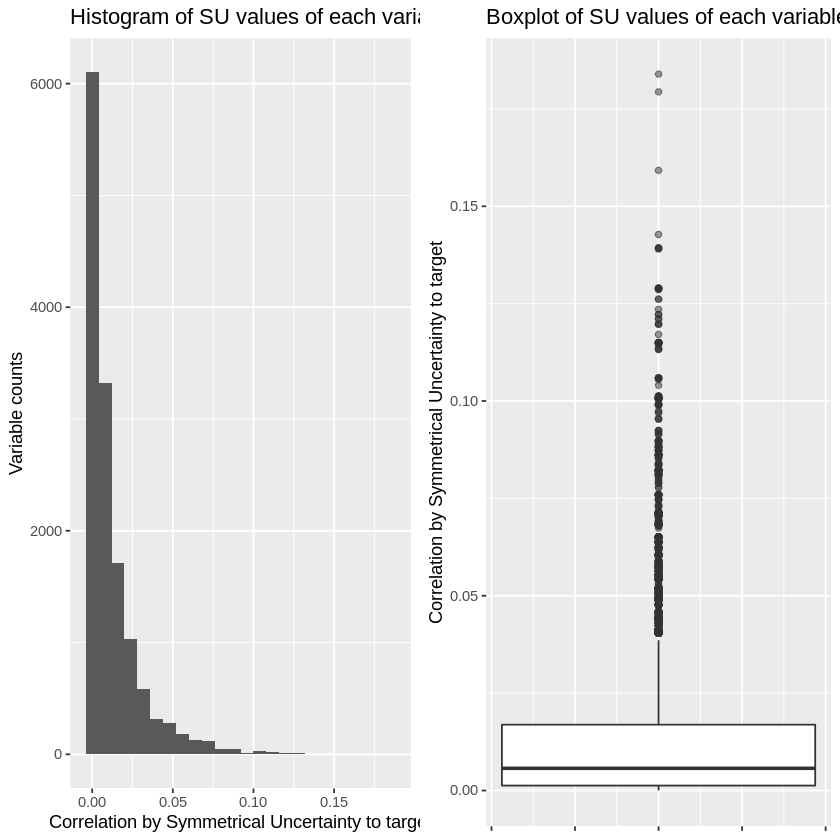

In [6]:
su_plot(discrete_expression,res)

## FCBF Analysis

Change cutoff???

In [7]:
fcbf_features <- fcbf(
                      discrete_expression,
                      res,
                      n_genes_selected_in_first_step = 6541,
                      minimum_su = 0.05,
                      verbose = FALSE,
                      samples_in_rows = FALSE,
                      balance_classes = FALSE
                     )


[1] "Number of features features =  13960"
[1] "Number of prospective features =  6591"
[1] "Number of final features =  44"


In [8]:
fcbf_table <- expr[fcbf_features$index,]

high_variance_genes <- sort(apply(expr, 1, var, na.rm = TRUE), decreasing = TRUE)
variance_table <- expr[names(high_variance_genes)[1:200], ]

In [9]:
length(rownames(variance_table))
head(rownames(variance_table))  

[1] 200

[1] "7306" "6490" "7299" "2315" "1638" "7425"

In [10]:
dataset_fcbf <- cbind(as.data.frame(t(fcbf_table)),Response = res)
dataset_200_var <- cbind(as.data.frame(t(variance_table)),Response = res)

In [11]:
# dataset_fcbf$Response <- as.character(dataset_fcbf$Response)
# dataset_fcbf$Response



# dataset_fcbf[dataset_fcbf$Response == '1',"Response"] <- 'Y' 
# dataset_fcbf[dataset_fcbf$Response == '0', "Response"] <- 'N' 
# dataset_fcbf$Response <- as.factor(dataset_fcbf$Response)
dim(dataset_fcbf)
head(dataset_fcbf)

[1] 74 45

,8325,390595,2218,11081,51710,408050,6891,146,441263,2259,⋯,57700,79722,25994,159963,283284,5018,81627,4325,148203,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,-0.2270632,-0.10095232,0.36688764,-0.1602859,0.24158479,-1.5161359,-0.9072911,-0.025742090,0.60301837,-0.38976236,⋯,0.27332112,-0.13006631,1.1670020,1.4445318,-0.23418078,-0.09064108,0.52554126,-1.1941896,0.2688855,N
5,-0.2633813,0.07571827,0.95794550,-0.1356653,-0.19222548,-0.2349990,-0.9926262,-0.005642442,0.05591390,-0.26230614,⋯,0.12739647,-0.19295919,0.1790866,-0.3431894,0.10600548,0.84559918,-0.57111635,0.4998832,0.4927618,N
6,-0.2545976,-0.03253946,0.44380029,-0.1322412,-0.03848573,0.1832004,-0.7013476,-0.030263057,0.09014593,0.18714923,⋯,-0.02331193,-0.09393971,0.1879659,1.2310925,-0.10290961,0.63911734,-0.27105339,2.6353718,0.5131420,N
7,-0.1389665,0.21199596,-0.06217297,-0.1223433,0.81148200,-0.5044181,-0.4612209,-0.030263057,1.62351592,-0.04892283,⋯,-0.54030865,-0.24247473,-0.4237047,-0.0539173,0.23464634,0.22792672,-0.74298469,1.1160561,-0.5726222,N
8,0.3670001,0.02686492,0.71220351,0.3988257,0.24195652,0.3535976,-1.1767555,0.231846708,0.13861574,1.61150477,⋯,-0.42937926,-0.24247473,-0.2777899,0.1542241,0.63137862,-0.16317273,0.71916120,3.8598474,-0.3065572,N
9,0.1371487,-0.41308759,0.22107234,-0.1581989,-0.24739991,-0.1028736,0.6538728,-0.028176013,-0.34377838,0.96765944,⋯,-0.31391990,0.03816384,0.4708478,-0.1826772,0.06560246,-0.41442483,-0.07484235,2.6394900,0.6121098,N


In [12]:
dim(dataset_200_var)
head(dataset_200_var)

[1]  74 201

,7306,6490,7299,2315,1638,7425,999,340273,260436,8190,⋯,58189,2596,4321,3675,202374,11105,388662,5104,4856,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,7.525107,4.6718764,2.81435120,3.126569,-2.5131510,-0.6084355,2.7589520,4.259234,-2.09742255,-4.71297876,⋯,4.0114601,-0.5533327,0.3598007,1.3677228,1.3414170,-1.222847,1.2273683,-1.0682312,0.5582675,N
5,4.107308,2.9382022,3.21824287,3.182154,0.8688709,-0.4448738,1.5102839,1.278215,-1.68883583,0.19364824,⋯,-0.7905474,-0.7731653,-1.0851571,0.1451069,1.8919517,1.836228,0.4949924,-1.0912029,0.4635962,N
6,-3.759172,-0.1612151,0.31776663,1.298456,1.0447218,1.6408717,0.2435168,1.436818,0.07186434,-0.05695824,⋯,-0.6805135,0.8788011,-1.0350284,-1.1816423,1.2153346,-1.419592,0.4016985,2.1416866,-2.0448214,N
7,3.882509,-0.3305673,2.19307886,-0.353756,5.2334936,-0.6506396,1.0707072,4.444903,-2.09742255,-0.67476421,⋯,-0.5864651,-0.5461152,-1.0973228,-1.0365508,1.2747643,-1.406279,-1.2107756,-0.7920749,1.8914066,N
8,-2.437743,-4.1664183,-4.02986660,-4.218951,-3.1268999,-0.1947492,-4.7986003,-3.308080,-1.86000205,2.62055605,⋯,-0.5141205,2.9000946,-1.0973228,0.7830814,-0.8747804,-1.622850,-1.4620515,0.2501835,-0.9741217,N
9,-3.677811,-5.5954656,0.06941943,-1.624688,-1.0019228,-0.2009416,-2.0040205,-3.852738,-2.09742255,0.94406653,⋯,-0.3315411,-0.2930159,1.2246399,-2.3202219,-1.8348035,-1.446019,-1.4849907,0.7929211,-1.4340910,N


## Output Gene Lists

In [13]:
fcbf.list <- colnames(dataset_fcbf)[-which(colnames(dataset_fcbf) %in% c("Response"))]
top200var.list <- colnames(dataset_200_var)[-which(colnames(dataset_200_var) %in% c("Response"))]
saveRDS(fcbf.list, "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/fcbf44.list.rds")
saveRDS(top200var.list, "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/top200var.list.rds")

# ROC Analysis

In [14]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, 
                     summaryFunction=twoClassSummary, classProbs=T,savePredictions = T)


## glmNet

In [15]:
glm_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "glmnet",
        trControl = control)

glm_top_200_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_200_var,
        method = "glmnet",
        trControl = control)

glm_fcbf_results <- glm_fcbf$results[glm_fcbf$results$ROC == max(glm_fcbf$results$ROC),]
glm_top_200_var_results <- glm_top_200_var$results[glm_top_200_var$results$ROC == max(glm_top_200_var$results$ROC),]

cat(paste0("For top 200 var: \n",
  "ROC = ",  glm_top_200_var_results$ROC, "\n",
             "Sensitivity  = ", glm_top_200_var_results$Sens, "\n",
             "Specificity  = ", glm_top_200_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  glm_fcbf_results$ROC, "\n",
             "Sensitivity  = ", glm_fcbf_results$Sens, "\n",
             "Specificity  = ", glm_fcbf_results$Spec))

For top 200 var: 
ROC = 0.545277777777778
Sensitivity  = 0.623333333333333
Specificity  = 0.433333333333333

For FCBF: 
ROC = 0.896388888888889
Sensitivity  = 0.855
Specificity  = 0.827777777777778

## SVM

In [16]:
svm_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "svmRadial",
        trControl = control)

svm_top_200_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_200_var,
        method = "svmRadial",
        trControl = control)

svm_fcbf_results <- svm_fcbf$results[svm_fcbf$results$ROC == max(svm_fcbf$results$ROC),]
svm_top_200_var_results <- svm_top_200_var$results[svm_top_200_var$results$ROC == max(svm_top_200_var$results$ROC),]

cat(paste0("For top 200 var: \n",
  "ROC = ",  svm_top_200_var_results$ROC, "\n",
             "Sensitivity  = ", svm_top_200_var_results$Sens, "\n",
             "Specificity  = ", svm_top_200_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  svm_fcbf_results$ROC, "\n",
             "Sensitivity  = ", svm_fcbf_results$Sens, "\n",
             "Specificity  = ", svm_fcbf_results$Spec))

For top 200 var: 
ROC = 0.507916666666667
Sensitivity  = 0.821666666666667
Specificity  = 0.133333333333333

For FCBF: 
ROC = 0.925694444444444
Sensitivity  = 0.726666666666667
Specificity  = 0.863888888888889 For top 200 var: 
ROC = 0.507916666666667
Sensitivity  = 0.821666666666667
Specificity  = 0.133333333333333

For FCBF: 
ROC = 0.925694444444444
Sensitivity  = 0.816666666666667
Specificity  = 0.772222222222222

## PCA Neural Network

In [17]:
nnet_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "pcaNNet",
        trControl = control)

nnet_top_200_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_200_var,
        method = "pcaNNet",
        trControl = control)

nnet_fcbf_results <- nnet_fcbf$results[nnet_fcbf$results$ROC == max(nnet_fcbf$results$ROC),]
nnet_top_200_var_results <- nnet_top_200_var$results[nnet_top_200_var$results$ROC == max(nnet_top_200_var$results$ROC),]

cat(paste0("For top 200 var: \n",
  "ROC = ",  nnet_top_200_var_results$ROC, "\n",
             "Sensitivity  = ", nnet_top_200_var_results$Sens, "\n",
             "Specificity  = ", nnet_top_200_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  nnet_fcbf_results$ROC, "\n",
             "Sensitivity  = ", nnet_fcbf_results$Sens, "\n",
             "Specificity  = ", nnet_fcbf_results$Spec))

# weights:  43
initial  value 33.056412 
iter  10 value 25.261922
iter  20 value 11.422351
iter  30 value 9.478124
iter  40 value 9.474327
iter  50 value 9.473675
iter  60 value 9.473620
iter  70 value 9.473404
final  value 9.473399 
converged
# weights:  125
initial  value 35.433260 
iter  10 value 7.672080
iter  20 value 7.401162
iter  30 value 7.261703
iter  40 value 5.725317
iter  50 value 5.724410
iter  60 value 5.724247
iter  70 value 5.724180
final  value 5.724151 
converged
# weights:  207
initial  value 33.081610 
iter  10 value 2.160472
iter  20 value 2.008829
iter  30 value 2.000053
iter  40 value 2.000001
final  value 2.000000 
converged
# weights:  43
initial  value 34.452124 
iter  10 value 10.716020
iter  20 value 10.449190
final  value 10.448984 
converged
# weights:  125
initial  value 44.888104 
iter  10 value 10.102869
iter  20 value 6.759399
iter  30 value 6.640678
iter  40 value 6.638197
final  value 6.638185 
converged
# weights:  207
initial  value 40.741740 
ite

initial  value 33.610672 
iter  10 value 9.317662
iter  20 value 9.036362
iter  30 value 8.577508
iter  40 value 7.089710
iter  50 value 5.486377
iter  60 value 5.478480
iter  70 value 5.475164
iter  80 value 5.472442
iter  90 value 5.469126
iter 100 value 3.858766
final  value 3.858766 
stopped after 100 iterations
# weights:  125
initial  value 33.657911 
iter  10 value 15.630093
iter  20 value 9.778977
iter  30 value 2.412386
iter  40 value 2.083422
iter  50 value 2.044592
iter  60 value 2.017645
iter  70 value 1.982925
iter  80 value 0.091285
iter  90 value 0.075739
iter 100 value 0.069602
final  value 0.069602 
stopped after 100 iterations
# weights:  207
initial  value 37.478013 
iter  10 value 4.040438
iter  20 value 3.979606
iter  30 value 3.961875
iter  40 value 3.935284
iter  50 value 2.069266
iter  60 value 2.052255
iter  70 value 2.044987
iter  80 value 2.039299
iter  90 value 2.035454
iter 100 value 2.031922
final  value 2.031922 
stopped after 100 iterations
# weights:  4

initial  value 32.968367 
iter  10 value 12.250636
iter  20 value 12.210316
iter  30 value 12.208951
final  value 12.208930 
converged
# weights:  125
initial  value 38.133310 
iter  10 value 5.727613
iter  20 value 2.931846
iter  30 value 2.004801
iter  40 value 2.000155
iter  50 value 1.999803
iter  60 value 1.998462
iter  70 value 1.998394
iter  80 value 1.998321
iter  90 value 1.998242
iter 100 value 1.998158
final  value 1.998158 
stopped after 100 iterations
# weights:  207
initial  value 38.739907 
iter  10 value 9.561460
iter  20 value 8.524579
iter  30 value 7.927795
iter  40 value 7.924278
iter  50 value 5.959134
iter  60 value 5.928746
iter  70 value 5.928653
final  value 5.928615 
converged
# weights:  43
initial  value 39.612818 
iter  10 value 11.964535
iter  20 value 9.536357
iter  30 value 9.501280
final  value 9.501214 
converged
# weights:  125
initial  value 41.048963 
iter  10 value 8.934799
iter  20 value 6.688832
iter  30 value 6.474557
iter  40 value 6.471463
fin

initial  value 42.805917 
iter  10 value 11.233032
iter  20 value 7.187585
iter  30 value 6.938086
iter  40 value 6.931665
iter  50 value 6.931220
final  value 6.931220 
converged
# weights:  207
initial  value 37.759873 
iter  10 value 8.685458
iter  20 value 6.435930
iter  30 value 6.349493
iter  40 value 6.347642
final  value 6.347633 
converged
# weights:  43
initial  value 35.529424 
iter  10 value 14.130740
iter  20 value 13.246317
iter  30 value 11.492320
iter  40 value 11.451180
iter  50 value 9.714568
iter  60 value 9.666461
iter  70 value 9.643353
iter  80 value 9.065875
iter  90 value 8.998914
iter 100 value 7.488216
final  value 7.488216 
stopped after 100 iterations
# weights:  125
initial  value 34.156745 
iter  10 value 6.123050
iter  20 value 3.635079
iter  30 value 2.113247
iter  40 value 2.102436
iter  50 value 2.093170
iter  60 value 2.077795
iter  70 value 2.049378
iter  80 value 2.028551
iter  90 value 2.015186
iter 100 value 1.968409
final  value 1.968409 
stopped

initial  value 37.481152 
iter  10 value 8.545780
iter  20 value 5.446165
iter  30 value 5.439208
iter  40 value 5.437662
iter  50 value 5.437501
iter  60 value 5.437380
iter  70 value 3.744297
iter  80 value 3.742158
iter  90 value 3.517499
iter 100 value 1.934708
final  value 1.934708 
stopped after 100 iterations
# weights:  125
initial  value 34.618408 
iter  10 value 5.609530
iter  20 value 4.983676
iter  30 value 4.219943
iter  40 value 3.924347
iter  50 value 3.921648
iter  60 value 3.913712
iter  70 value 3.875163
iter  80 value 2.001268
iter  90 value 2.000701
iter 100 value 2.000287
final  value 2.000287 
stopped after 100 iterations
# weights:  207
initial  value 38.669343 
iter  10 value 11.295965
iter  20 value 7.999922
iter  30 value 7.996012
iter  40 value 7.995526
iter  50 value 7.994911
iter  60 value 7.994109
iter  70 value 7.993026
iter  80 value 7.991492
iter  90 value 7.989187
iter 100 value 7.985457
final  value 7.985457 
stopped after 100 iterations
# weights:  4

initial  value 35.830615 
iter  10 value 12.360796
iter  20 value 10.542116
iter  30 value 8.531427
iter  40 value 8.494692
iter  50 value 8.494603
iter  50 value 8.494603
iter  50 value 8.494603
final  value 8.494603 
converged
# weights:  125
initial  value 36.767508 
iter  10 value 9.338501
iter  20 value 7.503743
iter  30 value 7.380659
iter  40 value 7.375600
final  value 7.375595 
converged
# weights:  207
initial  value 40.474138 
iter  10 value 9.975957
iter  20 value 6.146141
iter  30 value 5.868807
iter  40 value 5.852741
iter  50 value 5.852266
final  value 5.852264 
converged
# weights:  43
initial  value 36.648773 
iter  10 value 8.020999
iter  20 value 7.915635
iter  30 value 5.790725
iter  40 value 2.017428
iter  50 value 1.992983
iter  60 value 1.983676
iter  70 value 1.981452
iter  80 value 1.979719
iter  90 value 1.978643
iter 100 value 1.977867
final  value 1.977867 
stopped after 100 iterations
# weights:  125
initial  value 36.056834 
iter  10 value 8.449346
iter  

initial  value 36.896057 
iter  10 value 6.118324
iter  20 value 4.524198
iter  30 value 1.605439
iter  40 value 0.092227
iter  50 value 0.065241
iter  60 value 0.059492
iter  70 value 0.056842
iter  80 value 0.053719
iter  90 value 0.050671
iter 100 value 0.048500
final  value 0.048500 
stopped after 100 iterations
# weights:  207
initial  value 36.187718 
iter  10 value 10.160667
iter  20 value 10.150852
iter  30 value 8.135201
iter  40 value 8.106247
iter  50 value 7.539929
iter  60 value 5.744609
iter  70 value 4.746579
iter  80 value 4.640681
iter  90 value 4.154962
iter 100 value 3.251925
final  value 3.251925 
stopped after 100 iterations
# weights:  43
initial  value 33.022609 
iter  10 value 7.898713
iter  20 value 7.656393
iter  30 value 7.499791
iter  40 value 7.499585
iter  50 value 7.303951
final  value 7.000000 
converged
# weights:  125
initial  value 35.835909 
iter  10 value 3.975222
iter  20 value 3.957298
iter  30 value 3.947765
iter  40 value 3.936143
iter  50 value

initial  value 39.123924 
iter  10 value 3.085327
iter  20 value 2.036011
iter  30 value 2.002049
iter  40 value 2.000259
iter  50 value 2.000035
final  value 2.000015 
converged
# weights:  43
initial  value 35.369530 
iter  10 value 13.846909
iter  20 value 9.753439
iter  30 value 8.557770
iter  40 value 8.414498
final  value 8.414449 
converged
# weights:  125
initial  value 34.284724 
iter  10 value 8.945748
iter  20 value 6.305700
iter  30 value 6.172194
iter  40 value 6.170883
final  value 6.170883 
converged
# weights:  207
initial  value 44.836824 
iter  10 value 11.713682
iter  20 value 6.173804
iter  30 value 5.688663
iter  40 value 5.667407
iter  50 value 5.667325
final  value 5.667325 
converged
# weights:  43
initial  value 37.398275 
iter  10 value 12.898916
iter  20 value 10.101306
iter  30 value 8.073592
iter  40 value 6.090058
iter  50 value 6.043930
iter  60 value 5.933845
iter  70 value 5.922880
iter  80 value 5.888067
iter  90 value 3.873542
iter 100 value 2.087548


initial  value 34.035709 
iter  10 value 15.367354
iter  20 value 11.327632
iter  30 value 10.302405
iter  40 value 8.335705
iter  50 value 8.303315
iter  60 value 8.301875
iter  70 value 8.300426
iter  80 value 8.298964
iter  90 value 8.297485
iter 100 value 8.295983
final  value 8.295983 
stopped after 100 iterations
# weights:  207
initial  value 30.930048 
iter  10 value 2.964483
iter  20 value 2.097950
iter  30 value 2.080856
iter  40 value 0.083201
iter  50 value 0.054552
iter  60 value 0.051616
iter  70 value 0.042385
iter  80 value 0.036097
iter  90 value 0.033924
iter 100 value 0.032536
final  value 0.032536 
stopped after 100 iterations
# weights:  43
initial  value 33.798736 
iter  10 value 11.039102
iter  20 value 10.437933
iter  30 value 9.943721
iter  40 value 9.942701
iter  50 value 8.600678
iter  60 value 8.529512
iter  70 value 8.529435
final  value 8.529435 
converged
# weights:  125
initial  value 31.647956 
iter  10 value 5.953631
iter  20 value 3.960565
iter  30 va

initial  value 33.194945 
iter  10 value 7.624115
iter  20 value 5.642200
iter  30 value 5.260843
iter  40 value 5.154390
iter  50 value 5.139456
iter  60 value 3.158774
iter  70 value 2.341810
iter  80 value 2.170835
iter  90 value 2.145164
iter 100 value 2.138438
final  value 2.138438 
stopped after 100 iterations
# weights:  65
initial  value 36.116668 
iter  10 value 18.975880
iter  20 value 14.913059
iter  30 value 14.875749
iter  40 value 13.182975
iter  50 value 13.137657
iter  60 value 13.137544
final  value 13.137543 
converged
# weights:  191
initial  value 36.629052 
iter  10 value 13.183908
iter  20 value 11.177741
iter  30 value 10.725276
iter  40 value 10.655776
iter  50 value 10.321137
iter  60 value 10.180083
iter  70 value 7.891128
iter  80 value 6.834847
iter  90 value 6.575488
iter 100 value 6.420460
final  value 6.420460 
stopped after 100 iterations
# weights:  317
initial  value 37.800870 
iter  10 value 12.718345
iter  20 value 8.784984
iter  30 value 6.433944
it

initial  value 33.607639 
iter  10 value 16.702250
iter  20 value 6.215522
iter  30 value 6.131895
iter  40 value 6.115028
iter  50 value 5.227664
iter  60 value 5.215334
iter  70 value 5.048525
iter  80 value 5.048214
iter  90 value 5.048047
iter 100 value 5.047972
final  value 5.047972 
stopped after 100 iterations
# weights:  317
initial  value 40.451238 
iter  10 value 6.876038
iter  20 value 0.062517
iter  30 value 0.003796
final  value 0.000059 
converged
# weights:  65
initial  value 34.395240 
iter  10 value 25.238121
iter  20 value 17.500573
iter  30 value 13.125782
iter  40 value 10.423395
iter  50 value 10.292999
iter  60 value 10.288065
iter  70 value 10.288026
final  value 10.288023 
converged
# weights:  191
initial  value 42.634342 
iter  10 value 19.859269
iter  20 value 8.535015
iter  30 value 6.262272
iter  40 value 5.640557
iter  50 value 5.191146
iter  60 value 5.077885
iter  70 value 5.065351
iter  80 value 4.947396
iter  90 value 4.916792
iter 100 value 4.916150
f

initial  value 33.127029 
iter  10 value 7.432855
iter  20 value 5.595649
iter  30 value 5.320113
iter  40 value 5.004297
iter  50 value 5.000011
iter  60 value 5.000002
final  value 5.000000 
converged
# weights:  64
initial  value 37.285389 
iter  10 value 22.621803
iter  20 value 15.514713
iter  30 value 13.747116
iter  40 value 11.785546
iter  50 value 10.169031
iter  60 value 10.015144
iter  70 value 10.008659
final  value 10.008635 
converged
# weights:  188
initial  value 38.563456 
iter  10 value 18.376961
iter  20 value 10.971498
iter  30 value 8.513822
iter  40 value 6.620593
iter  50 value 5.787362
iter  60 value 5.675076
iter  70 value 5.674562
final  value 5.674559 
converged
# weights:  312
initial  value 39.380360 
iter  10 value 14.435809
iter  20 value 6.052377
iter  30 value 5.375057
iter  40 value 5.174495
iter  50 value 4.958010
iter  60 value 4.906178
iter  70 value 4.894806
iter  80 value 4.894718
final  value 4.894717 
converged
# weights:  64
initial  value 35.2

initial  value 33.832455 
iter  10 value 20.618321
iter  20 value 12.389403
iter  30 value 10.171647
iter  40 value 8.640837
iter  50 value 8.441302
iter  60 value 8.435370
final  value 8.435347 
converged
# weights:  191
initial  value 37.035745 
iter  10 value 19.280285
iter  20 value 9.969896
iter  30 value 8.242755
iter  40 value 7.771694
iter  50 value 7.433331
iter  60 value 6.295995
iter  70 value 5.979923
iter  80 value 5.843416
iter  90 value 5.832630
iter 100 value 5.832482
final  value 5.832482 
stopped after 100 iterations
# weights:  317
initial  value 46.674788 
iter  10 value 16.231421
iter  20 value 5.877130
iter  30 value 4.741237
iter  40 value 4.531627
iter  50 value 4.518254
iter  60 value 4.457388
iter  70 value 4.398753
iter  80 value 4.391364
iter  90 value 4.391193
final  value 4.391189 
converged
# weights:  65
initial  value 40.463668 
iter  10 value 29.198461
iter  20 value 25.575773
iter  30 value 25.571930
iter  40 value 24.775245
iter  50 value 23.646306
i

initial  value 36.285961 
iter  10 value 26.724813
iter  20 value 19.247960
iter  30 value 13.860233
iter  40 value 10.211932
iter  50 value 9.499566
iter  60 value 8.989511
iter  70 value 7.538861
iter  80 value 7.189981
iter  90 value 7.159395
iter 100 value 7.159149
final  value 7.159149 
stopped after 100 iterations
# weights:  191
initial  value 36.898103 
iter  10 value 16.497958
iter  20 value 7.373750
iter  30 value 5.739239
iter  40 value 4.901360
iter  50 value 4.537764
iter  60 value 4.511617
iter  70 value 4.511403
final  value 4.511398 
converged
# weights:  317
initial  value 40.490918 
iter  10 value 13.879747
iter  20 value 5.680351
iter  30 value 4.336245
iter  40 value 4.096773
iter  50 value 4.046881
iter  60 value 4.033125
iter  70 value 4.006725
iter  80 value 4.004790
iter  90 value 4.004716
final  value 4.004715 
converged
# weights:  65
initial  value 33.229162 
iter  10 value 22.320044
iter  20 value 18.082543
iter  30 value 12.644682
iter  40 value 7.699939
it

initial  value 35.280134 
iter  10 value 19.210541
iter  20 value 12.604839
iter  30 value 8.868179
iter  40 value 8.414932
iter  50 value 8.401048
iter  60 value 8.400889
final  value 8.400889 
converged
# weights:  188
initial  value 37.764545 
iter  10 value 16.264658
iter  20 value 6.160893
iter  30 value 4.480326
iter  40 value 4.334749
iter  50 value 4.303453
iter  60 value 4.302017
final  value 4.302006 
converged
# weights:  312
initial  value 45.359265 
iter  10 value 17.640570
iter  20 value 5.429943
iter  30 value 3.970621
iter  40 value 3.847385
iter  50 value 3.838040
iter  60 value 3.837780
final  value 3.837776 
converged
# weights:  64
initial  value 33.528586 
iter  10 value 17.962899
iter  20 value 16.386500
iter  30 value 14.707080
iter  40 value 13.634612
iter  50 value 12.234931
iter  60 value 12.230390
iter  70 value 9.505226
iter  80 value 9.402166
iter  90 value 9.318856
iter 100 value 9.305127
final  value 9.305127 
stopped after 100 iterations
# weights:  188


initial  value 36.133899 
iter  10 value 19.996490
iter  20 value 11.821715
iter  30 value 9.326997
iter  40 value 7.793166
iter  50 value 7.132301
iter  60 value 7.092917
iter  70 value 7.092075
final  value 7.092074 
converged
# weights:  191
initial  value 41.518288 
iter  10 value 16.981895
iter  20 value 8.922448
iter  30 value 5.379164
iter  40 value 4.616547
iter  50 value 4.505638
iter  60 value 4.426027
iter  70 value 4.424690
iter  80 value 4.424656
final  value 4.424656 
converged
# weights:  317
initial  value 44.216683 
iter  10 value 12.471362
iter  20 value 5.505872
iter  30 value 4.262740
iter  40 value 3.979351
iter  50 value 3.950401
iter  60 value 3.949109
iter  70 value 3.949099
iter  70 value 3.949099
iter  70 value 3.949099
final  value 3.949099 
converged
# weights:  65
initial  value 33.276546 
iter  10 value 15.183218
iter  20 value 7.773278
iter  30 value 7.543355
iter  40 value 3.936934
iter  50 value 3.772623
iter  60 value 3.771091
iter  70 value 3.770354
i

initial  value 36.592874 
iter  10 value 16.392433
iter  20 value 7.417335
iter  30 value 4.795462
iter  40 value 4.321393
iter  50 value 4.288059
iter  60 value 4.286265
iter  70 value 4.285789
iter  80 value 4.285747
final  value 4.285745 
converged
# weights:  312
initial  value 43.113400 
iter  10 value 9.300248
iter  20 value 4.709191
iter  30 value 4.108844
iter  40 value 4.029845
iter  50 value 4.016856
iter  60 value 4.016498
iter  70 value 4.016492
iter  70 value 4.016492
iter  70 value 4.016492
final  value 4.016492 
converged
# weights:  64
initial  value 37.514106 
iter  10 value 26.061124
iter  20 value 15.895895
iter  30 value 15.860153
iter  40 value 13.787000
iter  50 value 13.734915
iter  60 value 13.430214
iter  70 value 13.100003
iter  80 value 11.335309
iter  90 value 11.315750
iter 100 value 9.507000
final  value 9.507000 
stopped after 100 iterations
# weights:  188
initial  value 34.953114 
iter  10 value 11.389538
iter  20 value 7.869996
iter  30 value 7.024083


initial  value 48.320201 
iter  10 value 13.130655
iter  20 value 5.477669
iter  30 value 4.528050
iter  40 value 4.330439
iter  50 value 4.266639
iter  60 value 4.263908
iter  70 value 4.263884
final  value 4.263884 
converged
# weights:  65
initial  value 33.187417 
iter  10 value 18.820297
iter  20 value 18.021600
iter  30 value 14.061586
iter  40 value 12.474794
iter  50 value 12.470314
iter  60 value 12.467334
iter  70 value 12.464510
iter  80 value 12.461953
iter  90 value 12.459531
iter 100 value 10.761191
final  value 10.761191 
stopped after 100 iterations
# weights:  191
initial  value 35.801625 
iter  10 value 24.223886
iter  20 value 20.699051
iter  30 value 20.108495
iter  40 value 18.901647
iter  50 value 17.759858
iter  60 value 16.778696
iter  70 value 16.683942
iter  80 value 16.141058
iter  90 value 13.201606
iter 100 value 10.317096
final  value 10.317096 
stopped after 100 iterations
# weights:  317
initial  value 42.730550 
iter  10 value 9.759925
iter  20 value 6.

initial  value 33.471797 
iter  10 value 13.171483
iter  20 value 10.963658
iter  30 value 10.932665
iter  40 value 10.929593
iter  50 value 10.925477
iter  60 value 10.921774
iter  70 value 10.919833
iter  80 value 10.918165
iter  90 value 10.911971
iter 100 value 9.267362
final  value 9.267362 
stopped after 100 iterations
# weights:  191
initial  value 41.207282 
iter  10 value 13.480707
iter  20 value 12.249923
iter  30 value 11.921960
iter  40 value 8.998314
iter  50 value 8.913786
iter  60 value 8.691132
iter  70 value 8.328195
iter  80 value 6.724334
iter  90 value 5.753003
iter 100 value 5.009557
final  value 5.009557 
stopped after 100 iterations
# weights:  317
initial  value 36.258609 
iter  10 value 8.695171
iter  20 value 5.713421
iter  30 value 3.645030
iter  40 value 2.932563
iter  50 value 2.277137
iter  60 value 2.256828
iter  70 value 2.247366
iter  80 value 2.240241
iter  90 value 2.229672
iter 100 value 2.207429
final  value 2.207429 
stopped after 100 iterations
# 

## Gradient Boosting Machines (GBM)

In [18]:
gbm_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "gbm",
        trControl = control)

gbm_top_200_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_200_var,
        method = "gbm",
        trControl = control)

gbm_fcbf_results <- gbm_fcbf$results[gbm_fcbf$results$ROC == max(gbm_fcbf$results$ROC),]
gbm_top_200_var_results <- gbm_top_200_var$results[gbm_top_200_var$results$ROC == max(gbm_top_200_var$results$ROC),]

cat(paste0("For top 200 var: \n",
  "ROC = ",  gbm_top_200_var_results$ROC, "\n",
             "Sensitivity  = ", gbm_top_200_var_results$Sens, "\n",
             "Specificity  = ", gbm_top_200_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  gbm_fcbf_results$ROC, "\n",
             "Sensitivity  = ", gbm_fcbf_results$Sens, "\n",
             "Specificity  = ", gbm_fcbf_results$Spec))

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3004            -nan     0.1000    0.0189
     2        1.2718            -nan     0.1000   -0.0120
     3        1.2328            -nan     0.1000    0.0019
     4        1.1948            -nan     0.1000    0.0098
     5        1.1468            -nan     0.1000    0.0075
     6        1.1165            -nan     0.1000   -0.0083
     7        1.0889            -nan     0.1000   -0.0051
     8        1.0544            -nan     0.1000   -0.0016
     9        1.0431            -nan     0.1000   -0.0102
    10        1.0192            -nan     0.1000   -0.0042
    20        0.7694            -nan     0.1000    0.0082
    40        0.4868            -nan     0.1000   -0.0004
    60        0.3158            -nan     0.1000   -0.0015
    80        0.2157            -nan     0.1000   -0.0041
   100        0.1502            -nan     0.1000    0.0018
   120        0.1011            -nan     0.1000   -0.0009
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3285            -nan     0.1000   -0.0035
     2        1.2971            -nan     0.1000    0.0024
     3        1.2613            -nan     0.1000    0.0014
     4        1.2219            -nan     0.1000    0.0173
     5        1.1916            -nan     0.1000    0.0028
     6        1.1504            -nan     0.1000    0.0079
     7        1.1194            -nan     0.1000    0.0025
     8        1.1031            -nan     0.1000   -0.0089
     9        1.0751            -nan     0.1000    0.0049
    10        1.0381            -nan     0.1000    0.0007
    20        0.8461            -nan     0.1000   -0.0114
    40        0.5904            -nan     0.1000   -0.0039
    60        0.4492            -nan     0.1000   -0.0021
    80        0.3411            -nan     0.1000   -0.0033
   100        0.2426            -nan     0.1000   -0.0006
   120        0.1879            -nan     0.1000   -0.0050
   140        

For top 200 var: 
ROC = 0.658194444444444
Sensitivity  = 0.718333333333333
Specificity  = 0.416666666666667

For FCBF: 
ROC = 0.920972222222222
Sensitivity  = 0.863333333333333
Specificity  = 0.733333333333333

## Partial Least Squares

In [19]:
pls_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "pls",
        trControl = control)

pls_top_200_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_200_var,
        method = "pls",
        trControl = control)

pls_fcbf_results <- pls_fcbf$results[pls_fcbf$results$ROC == max(pls_fcbf$results$ROC),]
pls_top_200_var_results <- pls_top_200_var$results[pls_top_200_var$results$ROC == max(pls_top_200_var$results$ROC),]

cat(paste0("For top 200 var: \n",
  "ROC = ",  pls_top_200_var_results$ROC, "\n",
             "Sensitivity  = ", pls_top_200_var_results$Sens, "\n",
             "Specificity  = ", pls_top_200_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  pls_fcbf_results$ROC, "\n",
             "Sensitivity  = ", pls_fcbf_results$Sens, "\n",
             "Specificity  = ", pls_fcbf_results$Spec))

For top 200 var: 
ROC = 0.590555555555556
Sensitivity  = 0.575
Specificity  = 0.491666666666667

For FCBF: 
ROC = 0.857916666666667
Sensitivity  = 0.758333333333333
Specificity  = 0.819444444444444

## Cforest

In [20]:
cforest_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "svmRadial",
        trControl = control)

cforest_top_200_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_200_var,
        method = "svmRadial",
        trControl = control)

cforest_fcbf_results <- cforest_fcbf$results[cforest_fcbf$results$ROC == max(cforest_fcbf$results$ROC),]
cforest_top_200_var_results <- cforest_top_200_var$results[cforest_top_200_var$results$ROC == 
                                                               max(cforest_top_200_var$results$ROC),]

cat(paste0("For top 200 var: \n",
  "ROC = ",  cforest_top_200_var_results$ROC, "\n",
             "Sensitivity  = ", cforest_top_200_var_results$Sens, "\n",
             "Specificity  = ", cforest_top_200_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  cforest_fcbf_results$ROC, "\n",
             "Sensitivity  = ", cforest_fcbf_results$Sens, "\n",
             "Specificity  = ", cforest_fcbf_results$Spec))

For top 200 var: 
ROC = 0.534583333333333
Sensitivity  = 0.926666666666667
Specificity  = 0.136111111111111

For FCBF: 
ROC = 0.904583333333333
Sensitivity  = 0.708333333333333
Specificity  = 0.880555555555556 For top 200 var: 
ROC = 0.534583333333333
Sensitivity  = 0.926666666666667
Specificity  = 0.136111111111111

For FCBF: 
ROC = 0.904583333333333
Sensitivity  = 0.741666666666667
Specificity  = 0.869444444444444

## High Dimensional Discriminant Analysis

In [21]:
hdda_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "hdda",
        trControl = control)

hdda_top_200_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_200_var,
        method = "hdda",
        trControl = control)

hdda_fcbf_results <- hdda_fcbf$results[hdda_fcbf$results$ROC == max(hdda_fcbf$results$ROC),]
hdda_top_200_var_results <- hdda_top_200_var$results[hdda_top_200_var$results$ROC == max(hdda_top_200_var$results$ROC),]

cat(paste0("For top 200 var: \n",
  "ROC = ",  hdda_top_200_var_results$ROC, "\n",
             "Sensitivity  = ", hdda_top_200_var_results$Sens, "\n",
             "Specificity  = ", hdda_top_200_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  hdda_fcbf_results$ROC, "\n",
             "Sensitivity  = ", hdda_fcbf_results$Sens, "\n",
             "Specificity  = ", hdda_fcbf_results$Spec))

For top 200 var: 
ROC = 0.58125
Sensitivity  = 0.673333333333333
Specificity  = 0.525

For FCBF: 
ROC = 0.831388888888889
Sensitivity  = 0.725
Specificity  = 0.758333333333333

## Naïve Bayes

In [22]:
nb_fcbf <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_fcbf,
        method = "naive_bayes",
        trControl = control)

nb_top_200_var <-
  train(Response ~ .,
        metric="ROC",
        data = dataset_200_var,
        method = "naive_bayes",
        trControl = control)

nb_fcbf_results <- nb_fcbf$results[nb_fcbf$results$ROC == max(nb_fcbf$results$ROC),]
nb_top_200_var_results <- nb_top_200_var$results[nb_top_200_var$results$ROC == max(nb_top_200_var$results$ROC),]

cat(paste0("For top 200 var: \n",
  "ROC = ",  nb_top_200_var_results$ROC, "\n",
             "Sensitivity  = ", nb_top_200_var_results$Sens, "\n",
             "Specificity  = ", nb_top_200_var_results$Spec, "\n\n",
  "For FCBF: \n",
  "ROC = ",  nb_fcbf_results$ROC, "\n",
             "Sensitivity  = ", nb_fcbf_results$Sens, "\n",
             "Specificity  = ", nb_fcbf_results$Spec))

For top 200 var: 
ROC = 0.594027777777778
Sensitivity  = 0.786666666666667
Specificity  = 0.452777777777778

For FCBF: 
ROC = 0.958611111111111
Sensitivity  = 0.863333333333333
Specificity  = 0.969444444444444